In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklego.linear_model import LowessRegression
from scipy import stats
%matplotlib inline

In [2]:
# load metadata
metadata = pd.read_csv("/Users/dagmarschierova/MEGA/MBÚ/TNF/NGS/runs_merged/inputs/metadata_stool.tsv", 
                       sep='\t')
metadata = metadata.iloc[1:]
metadata.set_index('#SampleID', inplace=True)
metadata

,Label,Plate,Position,Patient,Age,Sex,Height,Weight,BMI,BMI_category,...,Response_scale3_Start_end,Dg_Response_scale2_Start_end,Disease_severity_scale2_Start_end,Disease_severity_scale4_Start_end,Response_scale2_Start_end_combined,Response_scale3_Start_end_combined,Dg_Response_scale2_Start_end_combined,Disease_severity_scale2_Start_end_combined,Disease_severity_scale4_Start_end_combined,Dg_Week38
#SampleID,,,,,,,,,,,,,,,,,,,,,
1_BA_1,1_BA_1,B1,A1,P1,25,F,170,77,26.6,overweight,...,baseline_start,CD_no_response_start,inactive_start,mild_start,no_response_start,baseline_start,CD_no_response_start,inactive_start,mild_start,CD_week_0
1_BA_2,1_BA_2,B1,B1,P1,25,F,170,77,26.6,overweight,...,full_response_NA,CD_response_NA,inactive_NA,remission_NA,response_NA,full_response_NA,CD_response_NA,inactive_NA,remission_NA,CD_week_2
1_BA_3,1_BA_3,B1,C1,P1,25,F,170,78,27,overweight,...,full_response_NA,CD_response_NA,inactive_NA,remission_NA,response_NA,full_response_NA,CD_response_NA,inactive_NA,remission_NA,CD_week_8
1_BA_4,1_BA_4,B1,D1,P1,25,F,170,79,27.3,overweight,...,full_response_NA,CD_response_NA,inactive_NA,remission_NA,response_NA,full_response_NA,CD_response_NA,inactive_NA,remission_NA,CD_week_14
1_BA_5,1_BA_5,B1,E1,P1,25,F,170,80,27.7,overweight,...,full_response_NA,CD_response_NA,inactive_NA,remission_NA,response_NA,full_response_NA,CD_response_NA,inactive_NA,remission_NA,CD_week_22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mock_4_DNA,mock_4_DNA,B2,B12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21_PP_8_ADA,21_PP_8_ADA,B2,E12,P21_ADA,25,F,165,64,23.5,normal,...,NaN,CD_NA,NaN,NaN,NaN,NaN,CD_NA,NaN,NaN,CD_NA
P72_DM_7,P72_DM_7,B2,F12,P72,34,F,175,56,18.3,underweight,...,full_response_end,CD_response_end,inactive_end,remission_end,response_end,full_response_end,CD_response_end,inactive_end,remission_end,CD_week_38


In [3]:
# load taxonomy week 38 CD
tax38CD = pd.read_csv("/Users/dagmarschierova/MEGA/MBÚ/TNF/NGS/runs_merged/outputs/qiime_results_B/taxonomy_no_raref_Week_38-CD/taxonomy-L7-rel.tsv", sep='\t', skiprows=1, index_col=0)
tax38CD = tax38CD.transpose()
tax38CD = tax38CD * 100
# filter Ruminococcus week 38 CD
rum38CD = tax38CD[["d__Bacteria;p__Firmicutes;c__Clostridia;o__Oscillospirales;f__Ruminococcaceae;g__Ruminococcus;s__uncultured_bacterium"]]
rum38CD = rum38CD.rename(columns={"d__Bacteria;p__Firmicutes;c__Clostridia;o__Oscillospirales;f__Ruminococcaceae;g__Ruminococcus;s__uncultured_bacterium": "Ruminococcus"})

# load taxonomy week 38 UC
tax38UC = pd.read_csv("/Users/dagmarschierova/MEGA/MBÚ/TNF/NGS/runs_merged/outputs/qiime_results_B/taxonomy_no_raref_Week_38-UC/taxonomy-L7-rel.tsv", sep='\t', skiprows=1, index_col=0)
tax38UC = tax38UC.transpose()
tax38UC = tax38UC * 100
# filter Ruminococcus week 38 UC
rum38UC = tax38UC[["d__Bacteria;p__Firmicutes;c__Clostridia;o__Oscillospirales;f__Ruminococcaceae;g__Ruminococcus;s__uncultured_bacterium"]]
rum38UC = rum38UC.rename(columns={"d__Bacteria;p__Firmicutes;c__Clostridia;o__Oscillospirales;f__Ruminococcaceae;g__Ruminococcus;s__uncultured_bacterium": "Ruminococcus"})


# load taxonomy
tax = pd.read_csv("/Users/dagmarschierova/MEGA/MBÚ/TNF/NGS/runs_merged/outputs/qiime_results_B/taxonomy_no_raref_Large_cohort/taxonomy-L7-rel.tsv", sep='\t', skiprows=1, index_col=0)
tax = tax.transpose()
tax = tax * 100
# filter Ruminococcus
rum = tax[["d__Bacteria;p__Firmicutes;c__Clostridia;o__Oscillospirales;f__Ruminococcaceae;g__Ruminococcus;s__uncultured_bacterium"]]
rum = rum.rename(columns={"d__Bacteria;p__Firmicutes;c__Clostridia;o__Oscillospirales;f__Ruminococcaceae;g__Ruminococcus;s__uncultured_bacterium": "Ruminococcus"})
rum

#OTU ID,Ruminococcus
1_BA_1,0.201362
1_BA_2,0.017007
1_BA_3,0.022646
1_BA_4,0.027044
1_BA_5,0.240722
...,...
P78_BL_8,0.891130
P79_MM_1,0.000000
P80_KA_1,0.021156
P80_KA_2,0.804169


In [4]:
# load shannon diversity values
shannon = pd.read_csv("/Users/dagmarschierova/MEGA/MBÚ/TNF/NGS/runs_merged/outputs/qiime_results_B/diversity_Large_cohort/alpha/shannon.tsv", sep='\t')
shannon = shannon.iloc[1:]
shannon.set_index('SampleID', inplace=True)
shannon

,Shannon_entropy
SampleID,
1_BA_1,5.245601555
1_BA_2,5.328261504
1_BA_3,5.230081928
1_BA_4,4.206164775
1_BA_5,4.908037192
...,...
P78_BL_8,6.070990062
P79_MM_1,5.613115942
P80_KA_1,5.015685951


In [5]:
# merge metadata with shannon and rum
metadata38CD = metadata.merge(shannon, how='inner', left_index=True, right_index=True)
metadata38CD = metadata.merge(rum38CD, how='inner', left_index=True, right_index=True)

metadata38UC = metadata.merge(shannon, how='inner', left_index=True, right_index=True)
metadata38UC = metadata.merge(rum38UC, how='inner', left_index=True, right_index=True)

metadata = metadata.merge(shannon, how='inner', left_index=True, right_index=True)
metadata = metadata.merge(rum, how='inner', left_index=True, right_index=True)
metadata

,Label,Plate,Position,Patient,Age,Sex,Height,Weight,BMI,BMI_category,...,Disease_severity_scale2_Start_end,Disease_severity_scale4_Start_end,Response_scale2_Start_end_combined,Response_scale3_Start_end_combined,Dg_Response_scale2_Start_end_combined,Disease_severity_scale2_Start_end_combined,Disease_severity_scale4_Start_end_combined,Dg_Week38,Shannon_entropy,Ruminococcus
1_BA_1,1_BA_1,B1,A1,P1,25,F,170,77,26.6,overweight,...,inactive_start,mild_start,no_response_start,baseline_start,CD_no_response_start,inactive_start,mild_start,CD_week_0,5.245601555,0.201362
1_BA_2,1_BA_2,B1,B1,P1,25,F,170,77,26.6,overweight,...,inactive_NA,remission_NA,response_NA,full_response_NA,CD_response_NA,inactive_NA,remission_NA,CD_week_2,5.328261504,0.017007
1_BA_3,1_BA_3,B1,C1,P1,25,F,170,78,27,overweight,...,inactive_NA,remission_NA,response_NA,full_response_NA,CD_response_NA,inactive_NA,remission_NA,CD_week_8,5.230081928,0.022646
1_BA_4,1_BA_4,B1,D1,P1,25,F,170,79,27.3,overweight,...,inactive_NA,remission_NA,response_NA,full_response_NA,CD_response_NA,inactive_NA,remission_NA,CD_week_14,4.206164775,0.027044
1_BA_5,1_BA_5,B1,E1,P1,25,F,170,80,27.7,overweight,...,inactive_NA,remission_NA,response_NA,full_response_NA,CD_response_NA,inactive_NA,remission_NA,CD_week_22,4.908037192,0.240722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
K22_1,K22_1,B2,G11,HC22,51,F,161,76,29.3,overweight,...,HC,HC,HC,HC,HC,HC,HC,HC,6.629727629,5.385220
K23_1,K23_1,B2,H11,HC23,33,M,186,95,27.5,overweight,...,HC,HC,HC,HC,HC,HC,HC,HC,5.403106622,1.249029
P72_DM_7,P72_DM_7,B2,F12,P72,34,F,175,56,18.3,underweight,...,inactive_end,remission_end,response_end,full_response_end,CD_response_end,inactive_end,remission_end,CD_week_38,6.279090304,1.097473
P53_CZ_8,P53_CZ_8,B2,G12,P53,41,F,160,74,28.9,overweight,...,inactive_end,mild_end,response_end,partial_response_end,CD_response_end,inactive_end,mild_end,CD_week_46,6.446036159,4.120983


In [6]:
convert_dict = {'Week_num': float,
                'Visit_num': float,
                'HBI_num': float,
                'pMayo_num': float,
                'Shannon_entropy': float,
                'Ruminococcus':float
               }
  
metadata = metadata.astype(convert_dict)
print(metadata.dtypes)

Label                                          object
Plate                                          object
Position                                       object
Patient                                        object
Age                                            object
                                               ...   
Disease_severity_scale2_Start_end_combined     object
Disease_severity_scale4_Start_end_combined     object
Dg_Week38                                      object
Shannon_entropy                               float64
Ruminococcus                                  float64
Length: 134, dtype: object


In [7]:
# filter out CD patients only
cd = metadata[(metadata['Dg']=='CD') & (-metadata["Label"].isin(['P53_CZ_8','P71_SJ_9']))]

# filter out UC patients only
uc = metadata[metadata['Dg']=='UC']

# filter out HC only
hc = metadata[(metadata['Dg']=='HC') & (-metadata["Label"].isin(['K9_Z80_1','K11_M87_1','K20_Z76_1']))]

### Create plots with lowess

In [8]:
# create a dictionary having individual patients as keys
patients_cd = dict()
for individual in cd['Patient'].unique():
    patients_cd[individual] = cd[(cd['Patient'] == individual)][["Week_num","HBI_num","Shannon_entropy","Ruminococcus"]]

patients_uc = dict()
for individual in uc['Patient'].unique():
    patients_uc[individual] = uc[(uc['Patient'] == individual)][["Week_num","pMayo_num","Shannon_entropy","Ruminococcus"]]

In [9]:
# sort the values according to week number and drop NA
for individual in patients_cd.keys():
    patients_cd[individual].sort_values('Week_num', inplace=True)
    patients_cd[individual].dropna(inplace=True)
    
for individual in patients_uc.keys():
    patients_uc[individual].sort_values('Week_num', inplace=True)
    patients_uc[individual].dropna(inplace=True)

In [10]:
cd_lowess = cd[['Ruminococcus','HBI_num','Shannon_entropy','Week_num']].dropna()
uc_lowess = uc[['Ruminococcus','pMayo_num','Shannon_entropy','Week_num']].dropna()

#### Model for CD Ruminococcus

In [11]:
# create a reg model
X = cd_lowess['Week_num'].to_numpy().reshape(-1,1)
y = cd_lowess['Ruminococcus'].to_numpy()
mod = LowessRegression(sigma=10).fit(X, y)

# predict with the model
x_pred = np.array([0,2,6,8,14,20,22,26,30,32,38]).reshape(-1, 1)
#x_pred = np.arange(start=0, stop=38.5, step=2).reshape(-1, 1)
y_pred = mod.predict(x_pred)
y_pred = pd.DataFrame(y_pred).rename(columns={0: "rumCD_pred_lowess"})
y_pred

# create a df with predicted values
pred_lowess_cd_hbi = y_pred.merge(pd.DataFrame(x_pred), left_index=True, right_index=True).rename(columns={0: "Week_pred"})
pred_lowess_cd_hbi

# calculate confidence interval
ci_cd_hbi = 1.96 * np.std(cd_lowess["Ruminococcus"])/np.mean(cd_lowess["Ruminococcus"])


#### Model for UC Ruminococcus

In [12]:
# create a reg model
X = uc_lowess['Week_num'].to_numpy().reshape(-1,1)
y = uc_lowess['Ruminococcus'].to_numpy()
mod = LowessRegression(sigma=10).fit(X, y)

# predict with the model
x_pred = np.array([0,2,6,8,14,20,22,26,30,32,38]).reshape(-1, 1)
#x_pred = np.arange(start=0, stop=38.5, step=2).reshape(-1, 1)
y_pred = mod.predict(x_pred)
y_pred = pd.DataFrame(y_pred).rename(columns={0: "rumUC_pred_lowess"})
y_pred

# create a df with predicted values
pred_lowess_uc_pmayo = y_pred.merge(pd.DataFrame(x_pred), left_index=True, right_index=True).rename(columns={0: "Week_pred"})
pred_lowess_uc_pmayo

# calculate confidence interval
ci_uc_pmayo = 1.96 * np.std(uc_lowess["Ruminococcus"])/np.mean(uc_lowess["Ruminococcus"])


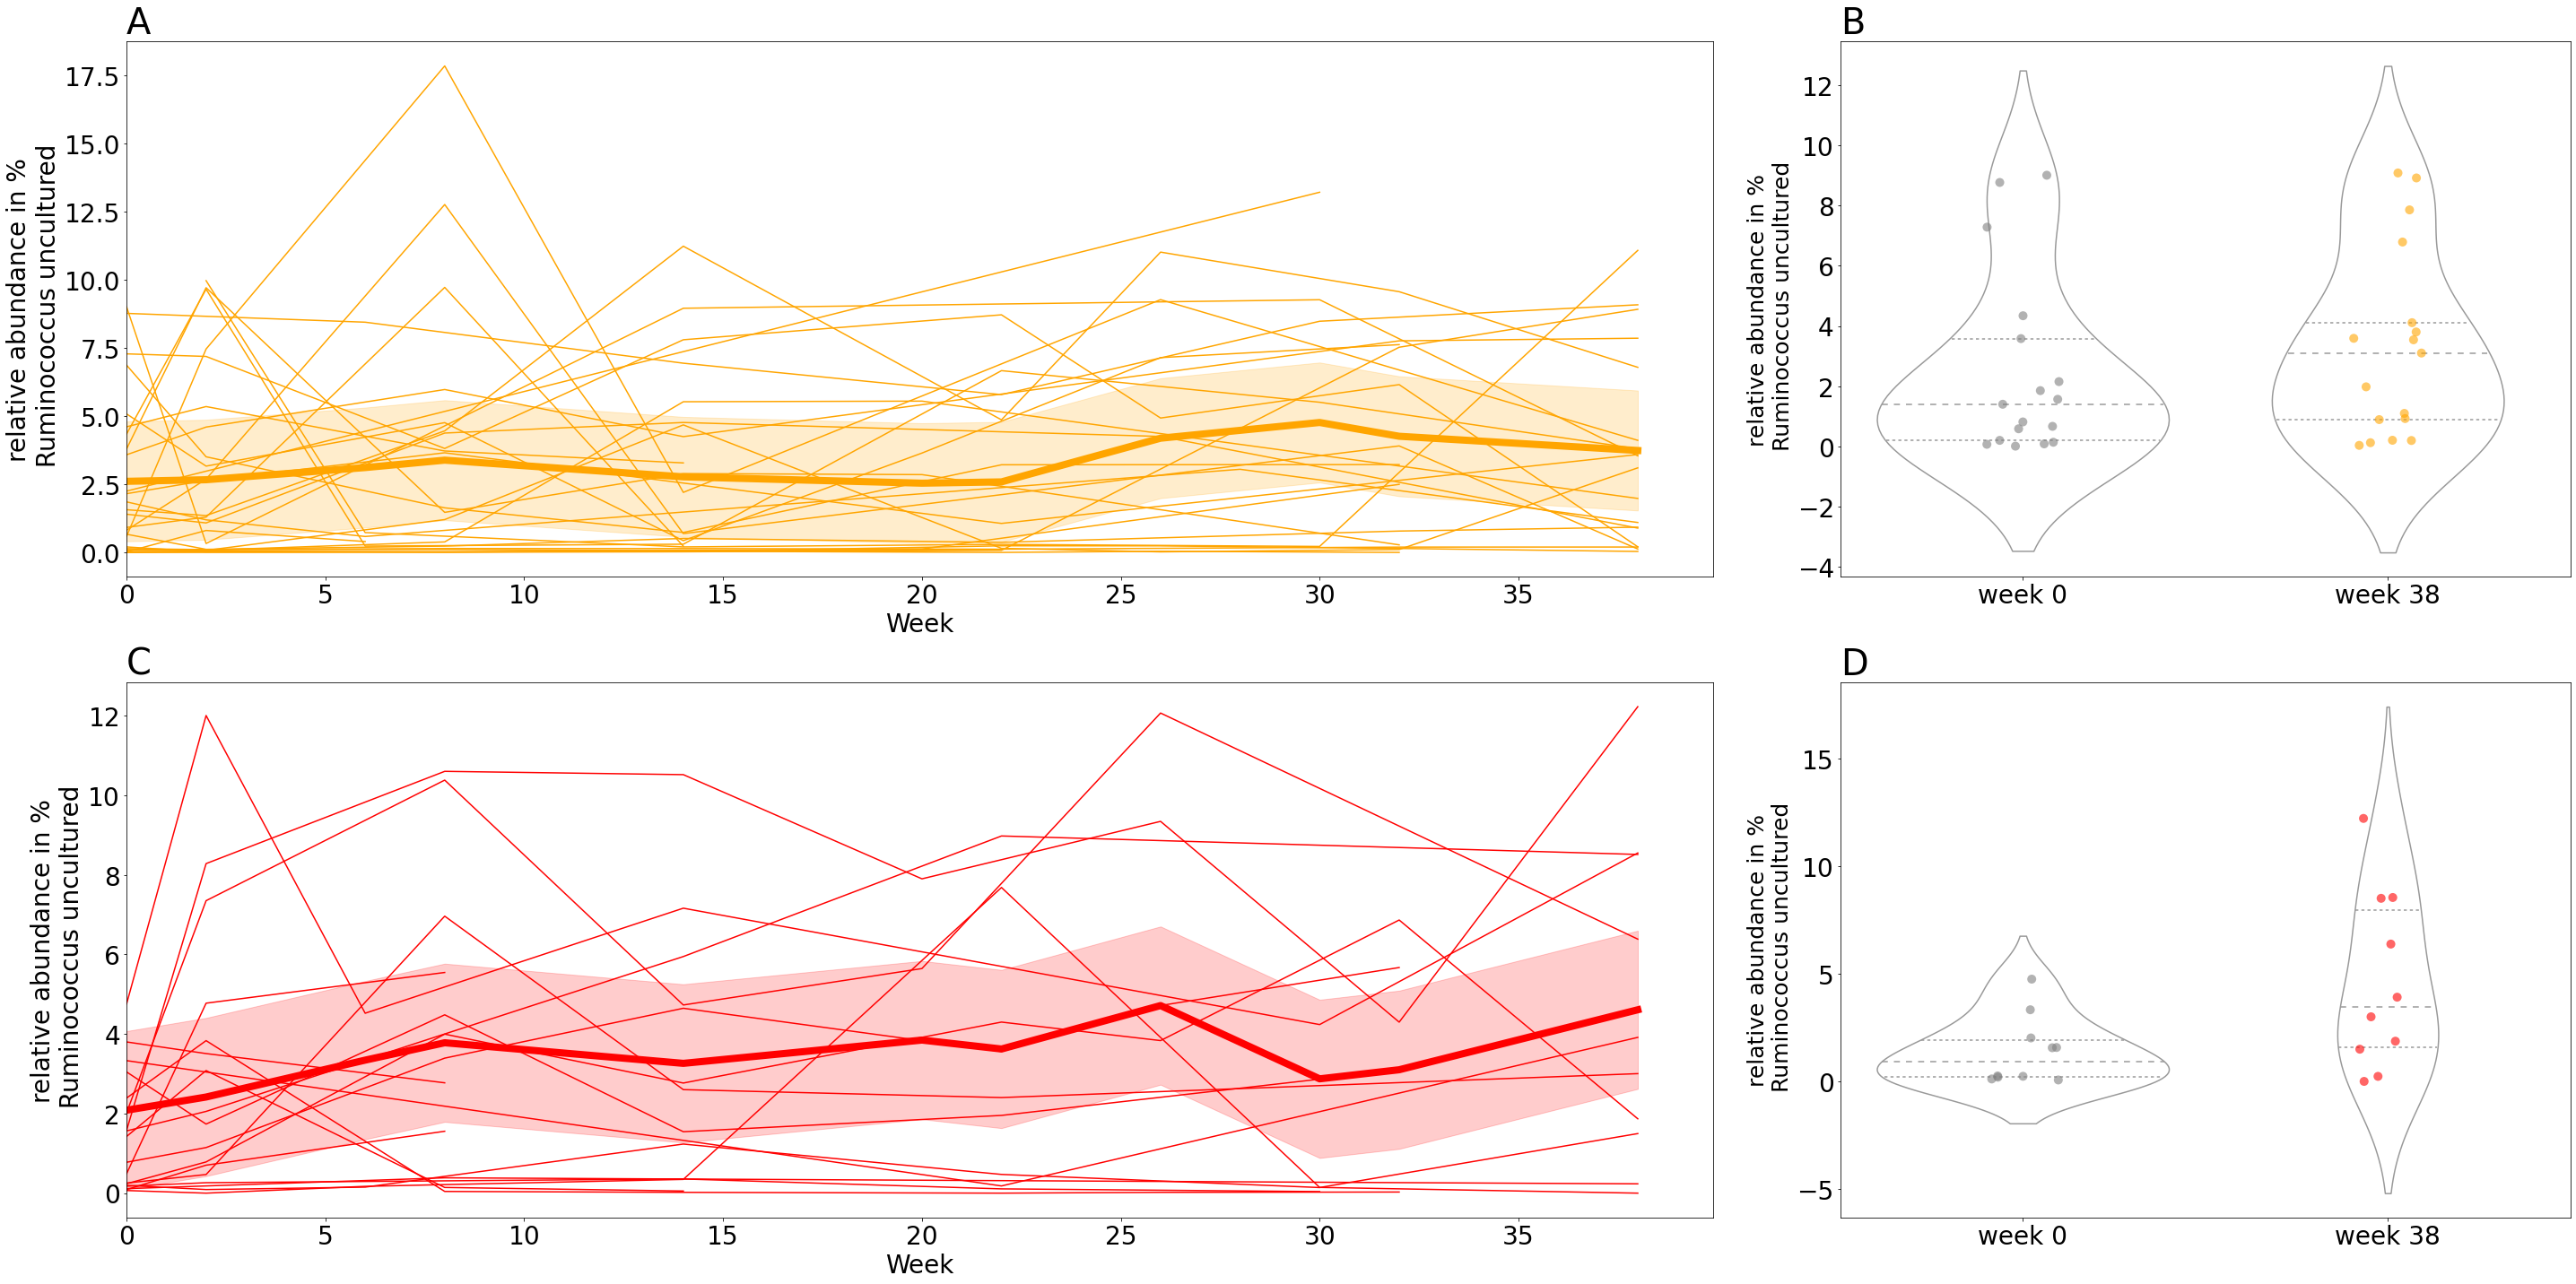

In [13]:
## relative abundance of Ruminococcus in time ##

# create grid for subplots
f3 = plt.figure()
f3.set_figwidth(40)
f3.set_figheight(20)

ax1 = plt.subplot2grid(shape=(2, 3), loc=(0, 0), colspan=2, rowspan=1)
ax2 = plt.subplot2grid(shape=(2, 3), loc=(0, 2), colspan=1, rowspan=1)
ax3 = plt.subplot2grid(shape=(2, 3), loc=(1, 0), colspan=2, rowspan=1)
ax4 = plt.subplot2grid(shape=(2, 3), loc=(1, 2), colspan=1, rowspan=1)

# plot all CD patients including trend line
for individual in patients_cd.keys():
    ax1.plot(patients_cd[individual]["Week_num"], patients_cd[individual]["Ruminococcus"], label = individual, color = 'orange')
ax1.plot(pred_lowess_cd_hbi["Week_pred"], pred_lowess_cd_hbi["rumCD_pred_lowess"], linewidth=8, color = 'orange')
ax1.fill_between(pred_lowess_cd_hbi["Week_pred"], (pred_lowess_cd_hbi["rumCD_pred_lowess"]-ci_cd_hbi), (pred_lowess_cd_hbi["rumCD_pred_lowess"]+ci_cd_hbi), color='orange', alpha=.2)
ax1.set_xlim(xmin=0)
ax1.set_title('A', fontsize=40, loc='left')
ax1.set_ylabel('relative abundance in %\n Ruminococcus uncultured', fontsize=28)
ax1.set_xlabel('Week', fontsize=28)
ax1.tick_params(axis='both', labelsize=28)

# plot all UC patients including trend line
for individual in patients_uc.keys():
    ax3.plot(patients_uc[individual]["Week_num"], patients_uc[individual]["Ruminococcus"], label = individual, color = 'red')
ax3.plot(pred_lowess_uc_pmayo["Week_pred"], pred_lowess_uc_pmayo["rumUC_pred_lowess"], linewidth=8, color = 'red')
ax3.fill_between(pred_lowess_uc_pmayo["Week_pred"], (pred_lowess_uc_pmayo["rumUC_pred_lowess"]-ci_uc_pmayo), (pred_lowess_uc_pmayo["rumUC_pred_lowess"]+ci_uc_pmayo), color='red', alpha=.2)
ax3.set_xlim(xmin=0)
ax3.set_title('C', fontsize=40, loc='left')
ax3.set_ylabel('relative abundance in %\n Ruminococcus uncultured', fontsize=28)
ax3.set_xlabel('Week', fontsize=28)
ax3.tick_params(axis='both', labelsize=28)


# violinplot week 0 vs week 38 CD
sns.violinplot(ax=ax2, data=metadata38CD, x='Week', y='Ruminococcus', color='white', inner='quartile')
sns.stripplot(ax=ax2, data=metadata38CD, x="Week", y="Ruminococcus", size=10, alpha=.6, palette=['grey','orange'])
ax2.set_title("B", fontsize=40, loc='left')
ax2.set_ylabel('relative abundance in %\n Ruminococcus uncultured', fontsize=25)
ax2.set_xlabel('')
ax2.tick_params(axis='both', labelsize=28)
ax2.set_xticklabels(['week 0', 'week 38'])

# violinplot week 0 vs week 38 UC
sns.violinplot(ax=ax4, data=metadata38UC, x='Week', y='Ruminococcus', color='white', inner='quartile')
sns.stripplot(ax=ax4, data=metadata38UC, x="Week", y="Ruminococcus", size=10, alpha=.6, palette=['grey','red'])
ax4.set_title("D", fontsize=40, loc='left')
ax4.set_ylabel('relative abundance in %\n Ruminococcus uncultured', fontsize=25)
ax4.set_xlabel('')
ax4.tick_params(axis='both', labelsize=28)
ax4.set_xticklabels(['week 0', 'week 38'])

plt.tight_layout()

f3.savefig('/Users/dagmarschierova/MEGA/MBÚ/TNF/NGS/runs_merged/outputs/qiime_results_B/taxonomy_no_raref_Large_cohort/Ruminococcus_in_time_&_week_38-lowess.png')

#### Model for UC Shannon vs Ruminococcus

In [14]:
# create a reg model
X = uc_lowess['Ruminococcus'].to_numpy().reshape(-1,1)
y = uc_lowess['Shannon_entropy'].to_numpy()
mod = LowessRegression(sigma=10).fit(X, y)

# predict with the model
x_pred = np.arange(start=0, stop=13, step=0.5).reshape(-1, 1)
y_pred = mod.predict(x_pred)
y_pred = pd.DataFrame(y_pred).rename(columns={0: "Shannon_pred_lowess"})
y_pred

# create a df with predicted values
pred_lowess_corr_uc_shannon = y_pred.merge(pd.DataFrame(x_pred), left_index=True, right_index=True).rename(columns={0: "rum_pred"})
pred_lowess_corr_uc_shannon

# calculate confidence interval
ci_uc_corr_shannon = 1.96 * np.std(uc_lowess["Shannon_entropy"])/np.mean(uc_lowess["Shannon_entropy"])

#### Model for CD Shannon vs Ruminococcus

In [15]:
# create a reg model
X = cd_lowess['Ruminococcus'].to_numpy().reshape(-1,1)
y = cd_lowess['Shannon_entropy'].to_numpy()
mod = LowessRegression(sigma=10).fit(X, y)

# predict with the model
x_pred = np.arange(start=0, stop=19, step=0.5).reshape(-1, 1)
y_pred = mod.predict(x_pred)
y_pred = pd.DataFrame(y_pred).rename(columns={0: "Shannon_pred_lowess"})
y_pred

# create a df with predicted values
pred_lowess_corr_cd_shannon = y_pred.merge(pd.DataFrame(x_pred), left_index=True, right_index=True).rename(columns={0: "rum_pred"})
pred_lowess_corr_cd_shannon

# calculate confidence interval
ci_cd_corr_shannon = 1.96 * np.std(cd_lowess["Shannon_entropy"])/np.mean(cd_lowess["Shannon_entropy"])

Text(14.5, 6.5, 'r(175)=0.41, p<0.0001')

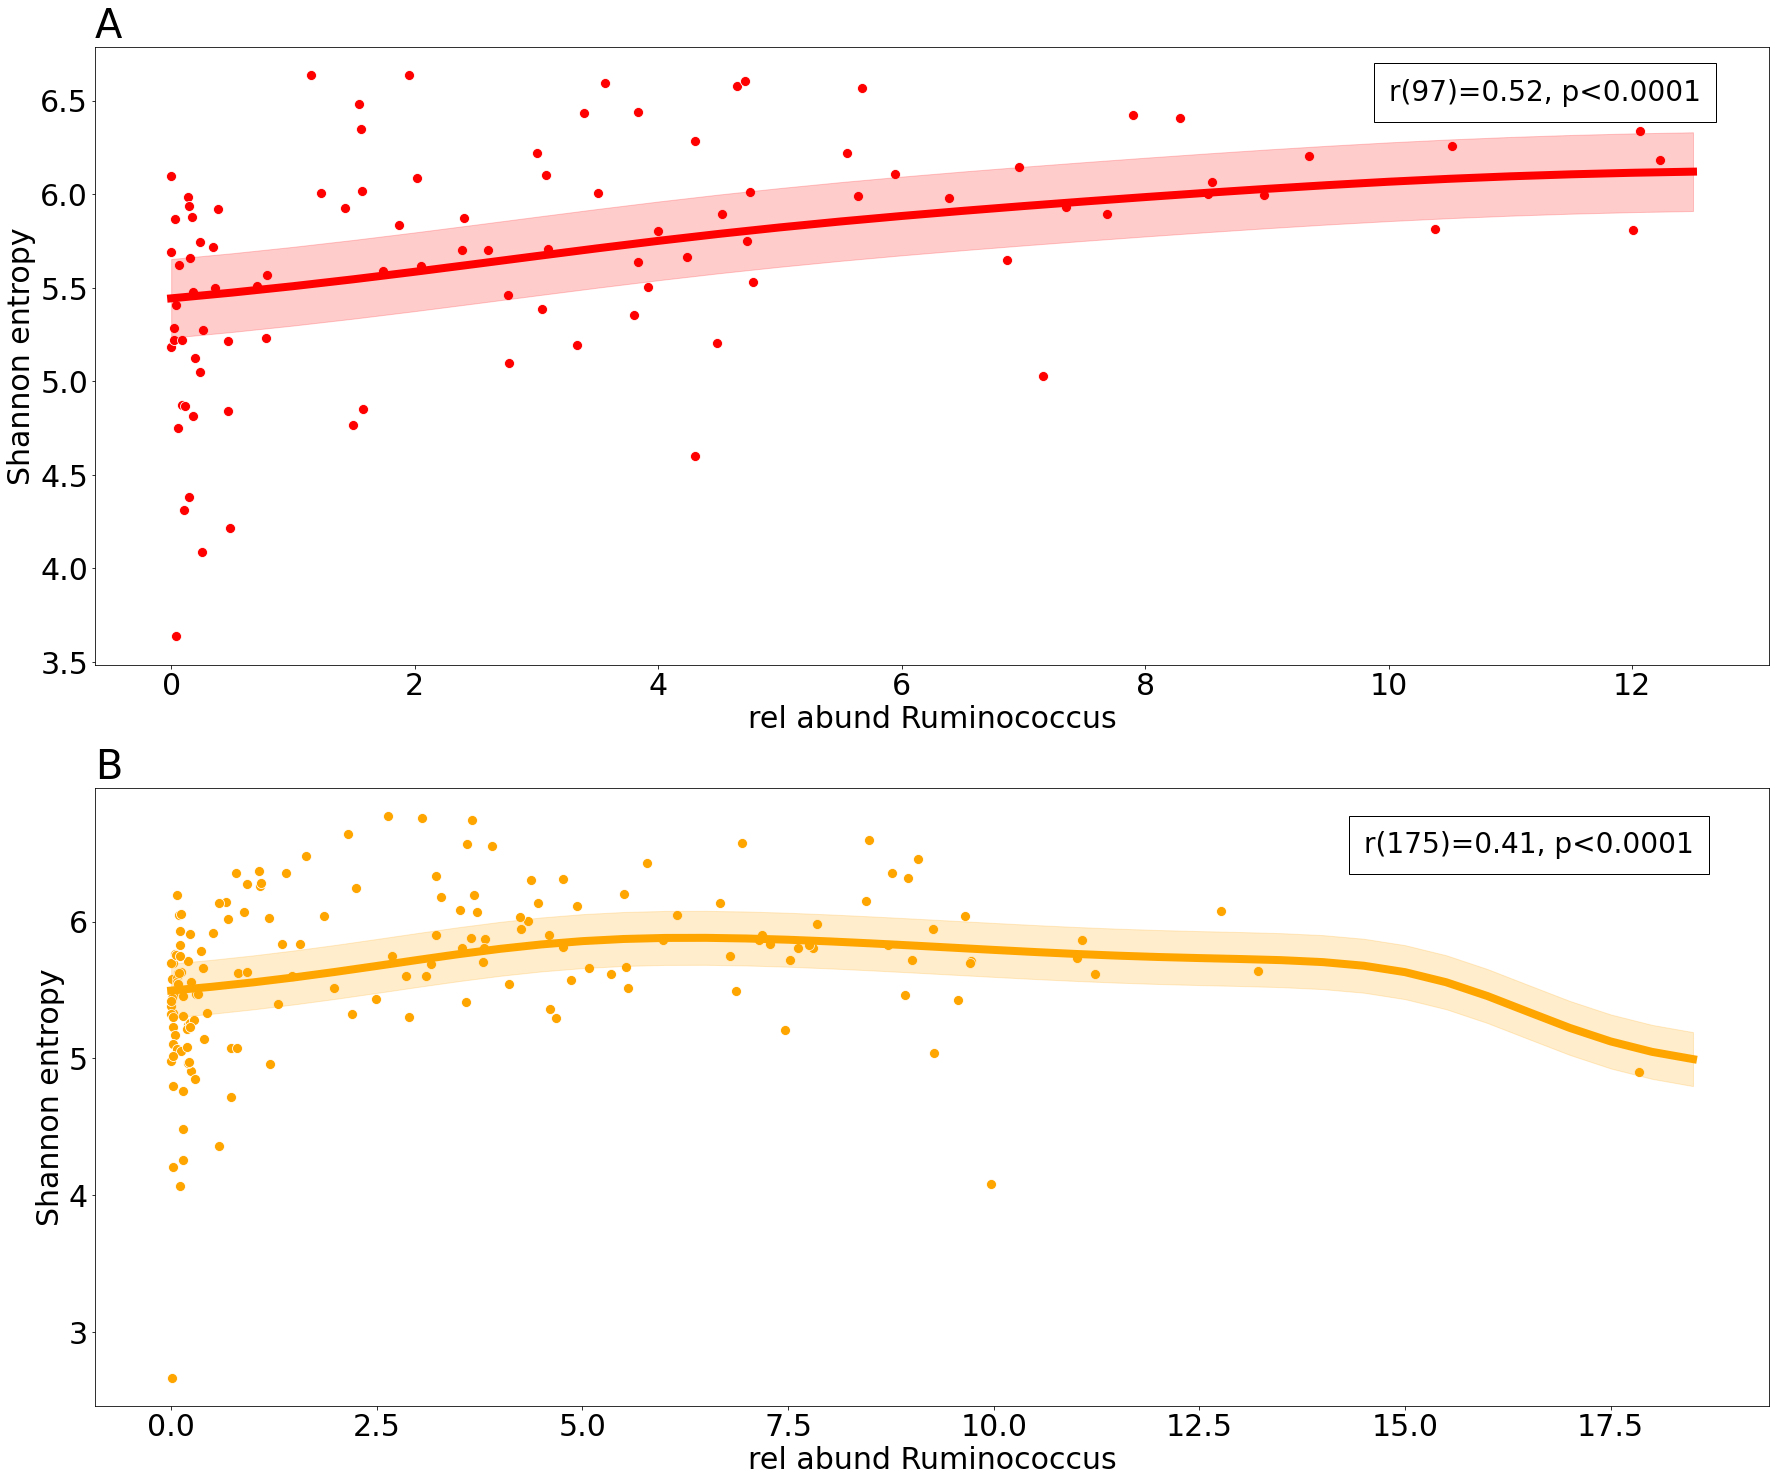

In [16]:
## correlation of Ruminococcus rel abund with Shannon ##

f4, (ax1, ax2) = plt.subplots(2, 1, figsize=(30,25))

# plot all UC patients including mean line
sns.scatterplot(ax=ax1, x=uc_lowess["Ruminococcus"], y=uc_lowess["Shannon_entropy"], color='red', 
                y_jitter=10, s=100)
ax1.plot(pred_lowess_corr_uc_shannon["rum_pred"], pred_lowess_corr_uc_shannon["Shannon_pred_lowess"], linewidth=8, color = 'red')
ax1.fill_between(pred_lowess_corr_uc_shannon["rum_pred"], (pred_lowess_corr_uc_shannon["Shannon_pred_lowess"]-ci_uc_corr_shannon), (pred_lowess_corr_uc_shannon["Shannon_pred_lowess"]+ci_uc_corr_shannon), color='red', alpha=.2)
ax1.set_title('A', loc='left', fontsize=40)
ax1.set_ylabel('Shannon entropy', fontsize=30)
ax1.set_xlabel('rel abund Ruminococcus', fontsize=30)
ax1.tick_params(axis='both', labelsize=30)
ax1.text(10, 6.5, "r(97)=0.52, p<0.0001", bbox={'facecolor': 'white', 'pad': 15}, fontsize=28)

# plot all CD patients including mean line
sns.scatterplot(ax=ax2, x=cd_lowess["Ruminococcus"], y=cd_lowess["Shannon_entropy"], color='orange', 
                y_jitter=10, s=100)
ax2.plot(pred_lowess_corr_cd_shannon["rum_pred"], pred_lowess_corr_cd_shannon["Shannon_pred_lowess"], linewidth=8, color = 'orange')
ax2.fill_between(pred_lowess_corr_cd_shannon["rum_pred"], (pred_lowess_corr_cd_shannon["Shannon_pred_lowess"]-ci_cd_corr_shannon), (pred_lowess_corr_cd_shannon["Shannon_pred_lowess"]+ci_cd_corr_shannon), color='orange', alpha=.2)
ax2.set_title('B', loc='left', fontsize=40)
ax2.set_ylabel('Shannon entropy', fontsize=30)
ax2.set_xlabel('rel abund Ruminococcus', fontsize=30)
ax2.tick_params(axis='both', labelsize=30)
ax2.text(14.5, 6.5, "r(175)=0.41, p<0.0001", bbox={'facecolor': 'white', 'pad': 15}, fontsize=28)



In [17]:
stats.spearmanr(cd_lowess["Ruminococcus"], cd_lowess["Shannon_entropy"], nan_policy='omit')

SpearmanrResult(correlation=0.4093040795838924, pvalue=3.6121509231107556e-08)

In [18]:
stats.spearmanr(uc_lowess["Ruminococcus"], uc_lowess["Shannon_entropy"], nan_policy='omit')

SpearmanrResult(correlation=0.5153366019533124, pvalue=5.644741272393893e-08)

#### Model for UC pMayo vs Ruminococcus

In [19]:
# create a reg model
X = uc_lowess['pMayo_num'].to_numpy().reshape(-1,1)
y = uc_lowess['Ruminococcus'].to_numpy()
mod = LowessRegression(sigma=2).fit(X, y)

# predict with the model
x_pred = np.arange(start=0, stop=14, step=1).reshape(-1, 1)
y_pred = mod.predict(x_pred)
y_pred = pd.DataFrame(y_pred).rename(columns={0: "rum_pred_lowess"})
y_pred

# create a df with predicted values
pred_lowess_corr_uc_pmayo = y_pred.merge(pd.DataFrame(x_pred), left_index=True, right_index=True).rename(columns={0: "pMayo_pred"})
pred_lowess_corr_uc_pmayo

# calculate confidence interval
ci_uc_corr_pmayo = 1.96 * np.std(uc_lowess["Ruminococcus"])/np.mean(uc_lowess["Ruminococcus"])

#### Model for CD HBI vs Ruminococcus

In [20]:
# create a reg model
X = cd_lowess['HBI_num'].to_numpy().reshape(-1,1)
y = cd_lowess['Ruminococcus'].to_numpy()
mod = LowessRegression(sigma=2).fit(X, y)

# predict with the model
x_pred = np.arange(start=0, stop=20, step=1).reshape(-1, 1)
y_pred = mod.predict(x_pred)
y_pred = pd.DataFrame(y_pred).rename(columns={0: "rum_pred_lowess"})
y_pred

# create a df with predicted values
pred_lowess_corr_cd_hbi = y_pred.merge(pd.DataFrame(x_pred), left_index=True, right_index=True).rename(columns={0: "HBI_pred"})
pred_lowess_corr_cd_hbi

# calculate confidence interval
ci_cd_corr_hbi = 1.96 * np.std(cd_lowess["Ruminococcus"])/np.mean(cd_lowess["Ruminococcus"])

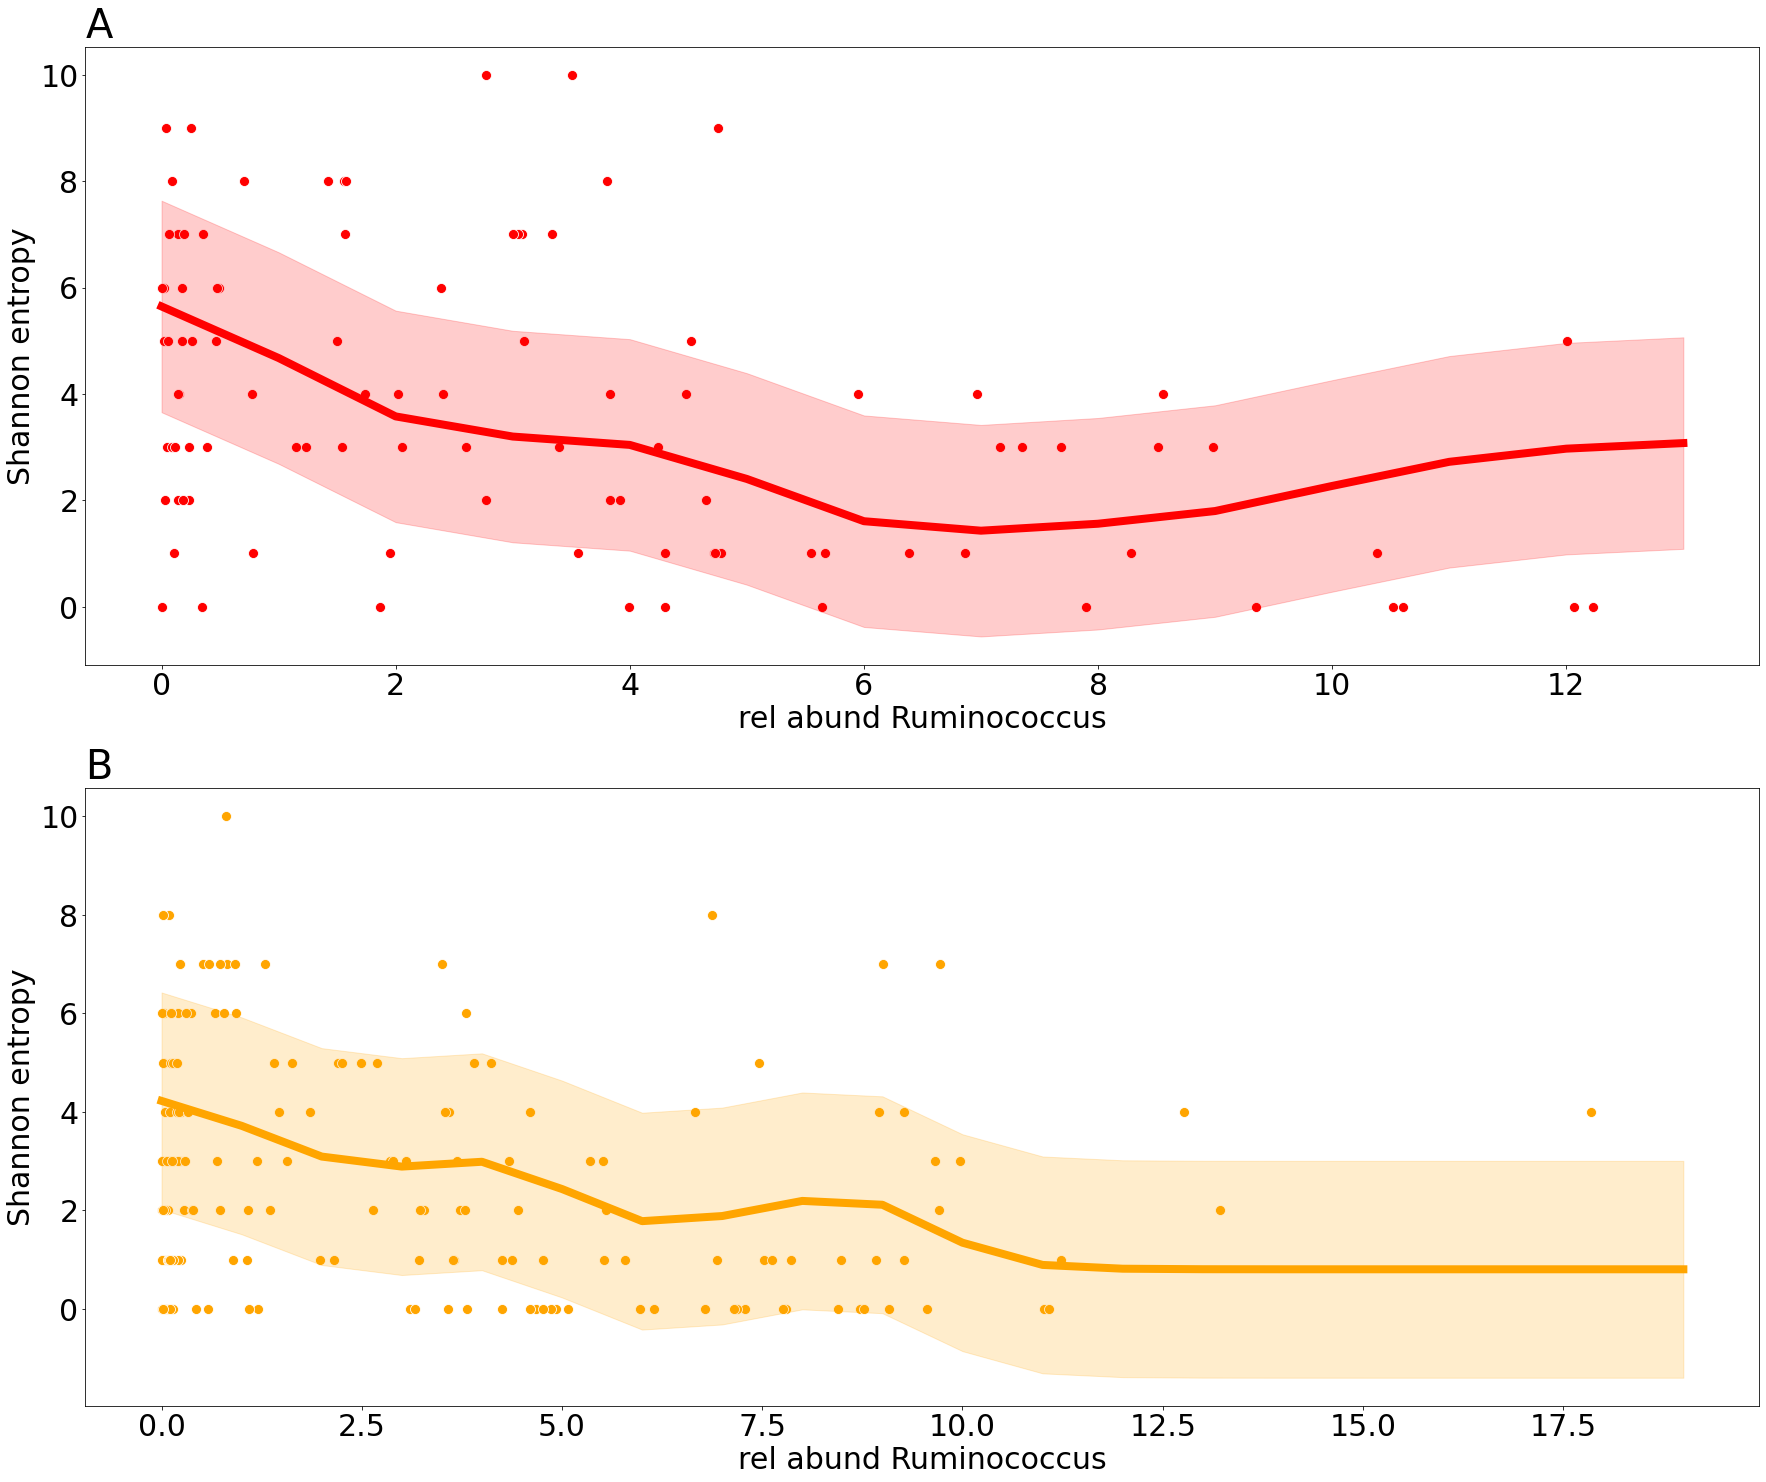

In [21]:
## correlation of Ruminococcus rel abund with clinical scores ##

f4, (ax1, ax2) = plt.subplots(2, 1, figsize=(30,25))

# plot all UC patients including mean line
sns.scatterplot(ax=ax1, x=uc_lowess["Ruminococcus"], y=uc_lowess["pMayo_num"], color='red', 
                y_jitter=10, s=100)
ax1.plot(pred_lowess_corr_uc_pmayo["pMayo_pred"], pred_lowess_corr_uc_pmayo["rum_pred_lowess"], linewidth=8, color = 'red')
ax1.fill_between(pred_lowess_corr_uc_pmayo["pMayo_pred"], (pred_lowess_corr_uc_pmayo["rum_pred_lowess"]-ci_uc_corr_pmayo), (pred_lowess_corr_uc_pmayo["rum_pred_lowess"]+ci_uc_corr_pmayo), color='red', alpha=.2)
ax1.set_title('A', loc='left', fontsize=40)
ax1.set_ylabel('Shannon entropy', fontsize=30)
ax1.set_xlabel('rel abund Ruminococcus', fontsize=30)
ax1.tick_params(axis='both', labelsize=30)
#ax1.text(8.0, 6.5, "r(97)=-0.42, p=0.000002", bbox={'facecolor': 'white', 'pad': 15}, fontsize=28)

# plot all CD patients including mean line
sns.scatterplot(ax=ax2, x=cd_lowess["Ruminococcus"], y=cd_lowess["HBI_num"], color='orange', 
                y_jitter=10, s=100)
ax2.plot(pred_lowess_corr_cd_hbi["HBI_pred"], pred_lowess_corr_cd_hbi["rum_pred_lowess"], linewidth=8, color = 'orange')
ax2.fill_between(pred_lowess_corr_cd_hbi["HBI_pred"], (pred_lowess_corr_cd_hbi["rum_pred_lowess"]-ci_cd_corr_hbi), (pred_lowess_corr_cd_hbi["rum_pred_lowess"]+ci_cd_corr_hbi), color='orange', alpha=.2)
ax2.set_title('B', loc='left', fontsize=40)
ax2.set_ylabel('Shannon entropy', fontsize=30)
ax2.set_xlabel('rel abund Ruminococcus', fontsize=30)
ax2.tick_params(axis='both', labelsize=30)
#ax2.text(8.2, 6.6, "r(175)=-0.14, p=0.056", bbox={'facecolor': 'white', 'pad': 15}, fontsize=28)




In [22]:
stats.spearmanr(cd_lowess["Ruminococcus"], cd_lowess["HBI_num"], nan_policy='omit')

SpearmanrResult(correlation=-0.2368909461680792, pvalue=0.001990397253867846)

In [23]:
stats.spearmanr(uc_lowess["Ruminococcus"], uc_lowess["pMayo_num"], nan_policy='omit')

SpearmanrResult(correlation=-0.4026912254169259, pvalue=3.943902785087305e-05)